Create a Sample Dataset

In [1]:
import pandas as pd
import numpy as np

# Generate a date range
dates = pd.date_range(start='2020-01-01', periods=100, freq='D')

# Generate synthetic sales data with some seasonality and noise
np.random.seed(42)
sales = 200 + 10 * np.sin(np.linspace(0, 3 * np.pi, 100)) + np.random.normal(scale=5, size=100)

# Create a DataFrame
data = pd.DataFrame({'Date': dates, 'Sales': sales})

# Save the dataset as a CSV file
data.to_csv('synthetic_sales_data.csv', index=False)

# Display the first few rows of the dataset
print(data.head())


        Date       Sales
0 2020-01-01  202.483571
1 2020-01-02  200.259239
2 2020-01-03  205.130955
3 2020-01-04  210.432475
4 2020-01-05  202.545858


Data Preprocessing

<ipython-input-2-5cb4dfc873a2>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


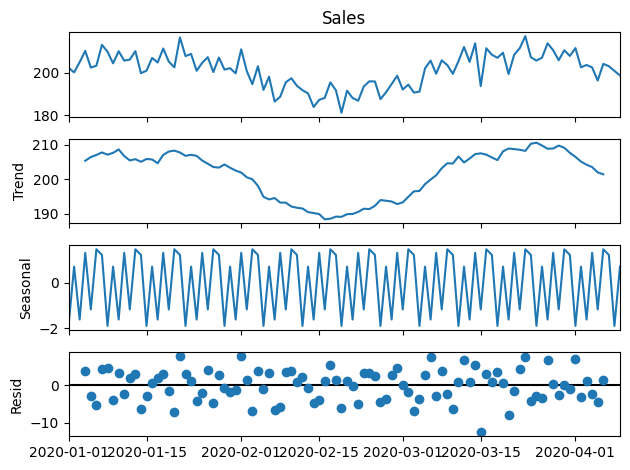

In [2]:
# Load the synthetic sales data
data = pd.read_csv('synthetic_sales_data.csv', parse_dates=['Date'], index_col='Date')

# Handle missing values (if any)
data.fillna(method='ffill', inplace=True)

# Decompose the time series to observe trend, seasonality, and noise
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['Sales'], model='additive', period=7)
decomposition.plot()

# Feature Engineering (e.g., adding lag features, moving averages)
data['Sales_Lag1'] = data['Sales'].shift(1)
data['Sales_MA3'] = data['Sales'].rolling(window=3).mean()

# Drop missing values created by lagging
data.dropna(inplace=True)

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, shuffle=False)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)


Model Building

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features and target
X_train = train_scaled[:, 1:]  # Exclude the target variable
y_train = train_scaled[:, 0]   # Target variable (Sales)
X_test = test_scaled[:, 1:]
y_test = test_scaled[:, 0]

# Build the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the sales for the test set
y_pred = model.predict(X_test)


Evaluation

Root Mean Squared Error: 0.37798545093682556
Mean Squared Error: 0.14287300111991535
R-squared: 0.6353443267333315


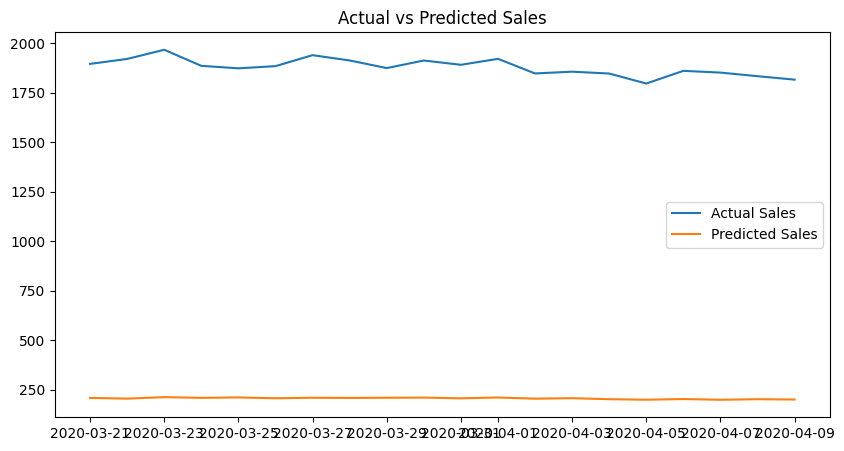

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {model.score(X_test, y_test)}')

# Optionally, inverse transform to get actual values for comparison
y_test_actual = scaler.inverse_transform(test)[:, 0]
y_pred_actual = scaler.inverse_transform(np.column_stack((y_pred, X_test)))[:, 0]

# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test.index, y_test_actual, label='Actual Sales')
plt.plot(test.index, y_pred_actual, label='Predicted Sales')
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.show()


Rationale Behind Model Choice
Linear Regression: Acts as a baseline model to predict the sales based on past values.
Feature Engineering: The use of lagged features and moving averages helps the model to predict future sales based on past trends.